In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'original image')

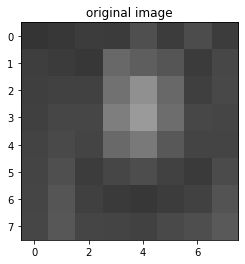

In [14]:
# Reading & Displaying the image.
image = np.genfromtxt('image.csv', delimiter=';')
imageHeight = image.shape[0]
imageWidth = image.shape[1]

plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.title('original image')

In [15]:
# Image metrics.

# Luminance.
luminance = np.mean(image)
print("Image luminance : ",luminance)

# Dynamic range of the image.
max = np.amax(image)
min = np.amin(image)
print("Image dynamic range: [",min," - ",max,"]")

# Contrast of the image.
imageContrast = round((max - min) / (max + min),3)
print("Image contrast: ", imageContrast)

# Standard deviation of the image.
imageStd = np.std(image)
print("Image standard deviation: ",imageStd)

Image luminance :  76.078125
Image dynamic range: [ 52.0  -  154.0 ]
Image contrast:  0.495
Image standard deviation:  20.916728269124093


<BarContainer object of 256 artists>

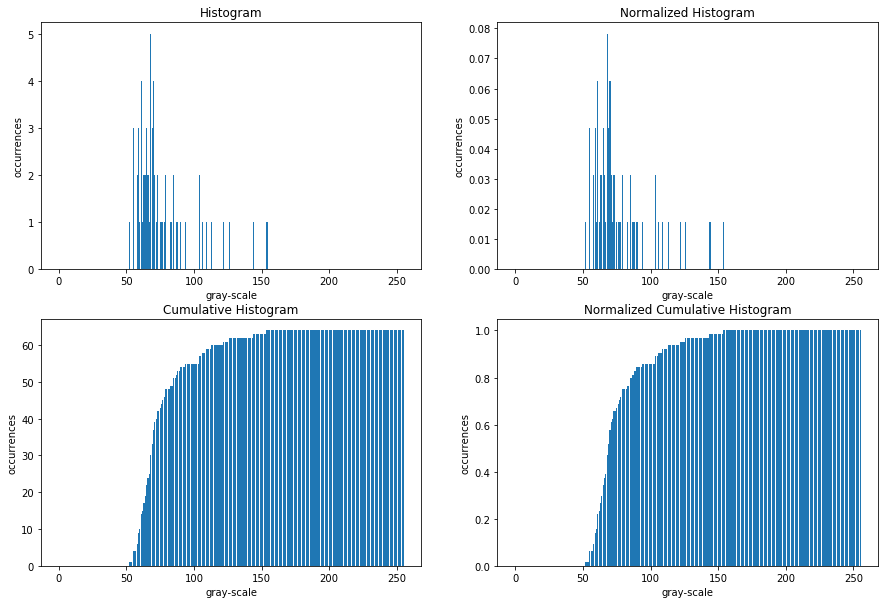

In [16]:
# Histograms.
def histogram(image):
    imageHistogram = np.zeros(shape=(256))
    unique, counts = np.unique(image, return_counts=True)
    for i in range(0,unique.shape[0]):
        imageHistogram[int(unique[i])] = counts[i]
    return imageHistogram

def normalizedHistogram(histogram, width, height):
    return histogram / (height * width)

def cumulativeHistogram(histogram):
    cumulativeHistogram = np.zeros(shape= histogram.shape)
    cumulativeHistogram[0] = histogram[0] 
    for i in range(1,cumulativeHistogram.shape[0]):
        cumulativeHistogram[i] = histogram[i] + cumulativeHistogram[i-1]
    return cumulativeHistogram

def normalizedCumulativeHistogram(cumulativeHistogram, width, height):
    return cumulativeHistogram / (width * height)

# Histogram.
imageHistogram = histogram(image)

# Cumulative Histogram.
cumulHistogram = cumulativeHistogram(imageHistogram)

# Normalized Histogram.
normHistogram = normalizedHistogram(imageHistogram, imageWidth, imageHeight)

# Normalized cumulative Histogram.
nCumulativeHistogram = normalizedCumulativeHistogram(cumulHistogram,imageWidth, imageHeight)


plt.figure(figsize=(15,10))
plt.subplot(221);plt.title('Histogram');plt.xlabel('gray-scale'),plt.ylabel('occurrences');plt.bar(np.arange(0,256),imageHistogram)
plt.subplot(222);plt.title('Normalized Histogram');plt.xlabel('gray-scale'),plt.ylabel('occurrences');plt.bar(np.arange(0,256),normHistogram)
plt.subplot(223);plt.title('Cumulative Histogram');plt.xlabel('gray-scale'),plt.ylabel('occurrences');plt.bar(np.arange(0,256),cumulHistogram)
plt.subplot(224);plt.title('Normalized Cumulative Histogram');plt.xlabel('gray-scale'),plt.ylabel('occurrences');plt.bar(np.arange(0,256),nCumulativeHistogram)


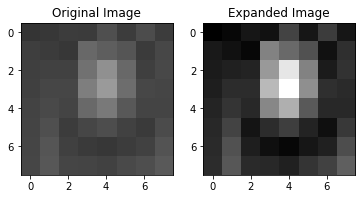

In [17]:
# Expanding the image.
def expandImage(image, min, max):
    expandedImage = []
    for row in image:
        temp = []
        for pixel in row:
            temp.append(((pixel - min)/(max - min))*255)
        expandedImage.append(temp)
    return np.array(expandedImage)
    
expandedImage = expandImage(image, min, max)
plt.subplot(121);plt.title('Original Image');plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.subplot(122);plt.title('Expanded Image');plt.imshow(expandedImage,cmap='gray',vmin=0,vmax=255)

<BarContainer object of 256 artists>

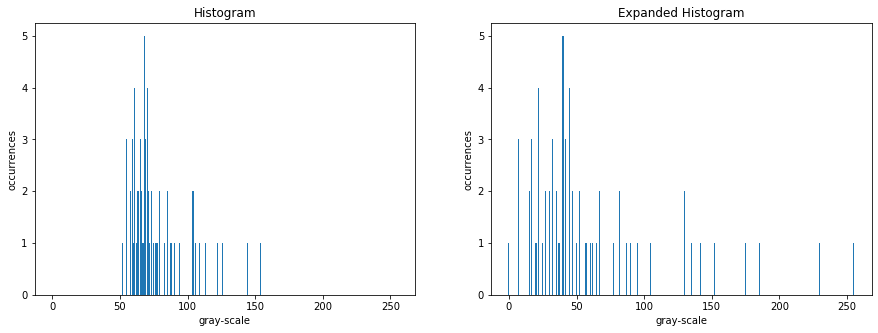

In [18]:
# Histogram Expansion.

expandedHistogram = histogram(expandedImage)

plt.figure(figsize=(15,5))
plt.subplot(121);plt.title('Histogram');plt.xlabel('gray-scale'),plt.ylabel('occurrences');plt.bar(np.arange(0,256),imageHistogram)
plt.subplot(122);plt.title('Expanded Histogram');plt.xlabel('gray-scale'),plt.ylabel('occurrences');plt.bar(np.arange(0,256),expandedHistogram)


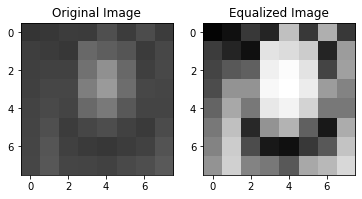

In [19]:
# Equalizing the image.
def equalizeImage(image, width, height):
    hist = histogram(image)
    cumulHist = cumulativeHistogram(hist)
    nCumulHistogram = normalizedCumulativeHistogram(cumulHist,width,height)
    equalizedImage = []
    for row in image:
        temp = []
        for pixel in row:
            temp.append(nCumulHistogram[int(pixel)] * 255)
        equalizedImage.append(temp)
    return np.array(equalizedImage)

equalizedImage = equalizeImage(image, imageWidth, imageHeight)
plt.subplot(121);plt.title('Original Image');plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.subplot(122);plt.title('Equalized Image');plt.imshow(equalizedImage,cmap='gray',vmin=0,vmax=255)

<BarContainer object of 256 artists>

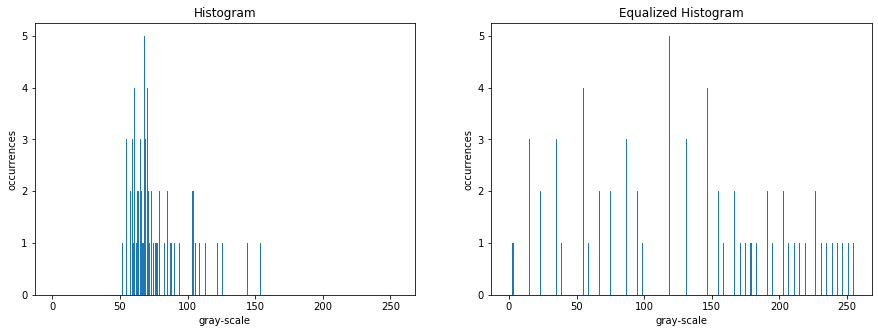

In [20]:
# Histogram Equalization.
equalizedHistogram = histogram(equalizedImage)
plt.figure(figsize=(15,5))
plt.subplot(121);plt.title('Histogram');plt.xlabel('gray-scale'),plt.ylabel('occurrences');plt.bar(np.arange(0,256),imageHistogram)
plt.subplot(122);plt.title('Equalized Histogram');plt.xlabel('gray-scale'),plt.ylabel('occurrences');plt.bar(np.arange(0,256),equalizedHistogram)

In [21]:
#Improving the contrast of the given images using the histogram expansion and equalization.
fig1 = plt.imread('Fig0208(a).tif'); plt.gray()
fig2 = plt.imread('Fig0210(a).tif'); plt.gray()
fig3 = plt.imread('Fig0228(a).tif'); plt.gray()


<Figure size 432x288 with 0 Axes>

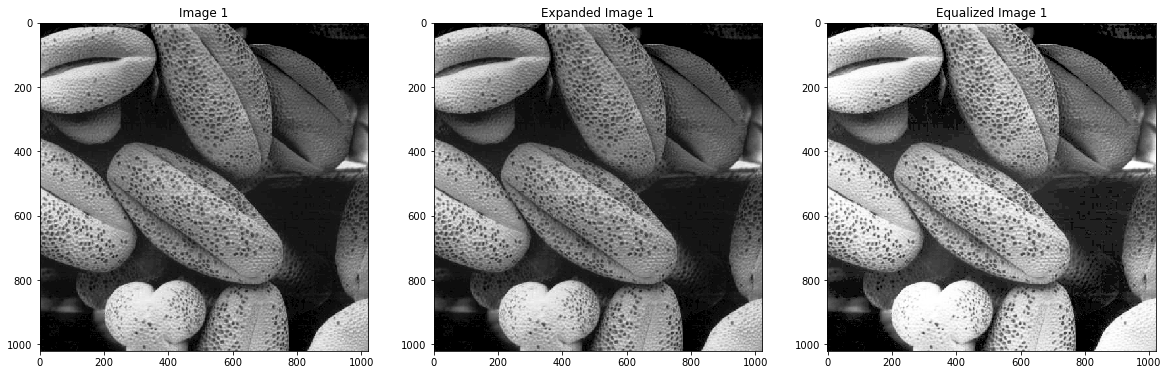

In [22]:
expandedFig1 = expandImage(fig1, np.amin(fig1), np.amax(fig1))
equalizedFig1 = equalizeImage(fig1,fig1.shape[1], fig1.shape[0])

plt.figure(figsize=(20,15))
plt.subplot(131);plt.title('Image 1');plt.imshow(fig1)
plt.subplot(132);plt.title('Expanded Image 1');plt.imshow(expandedFig1)
plt.subplot(133);plt.title('Equalized Image 1');plt.imshow(equalizedFig1)

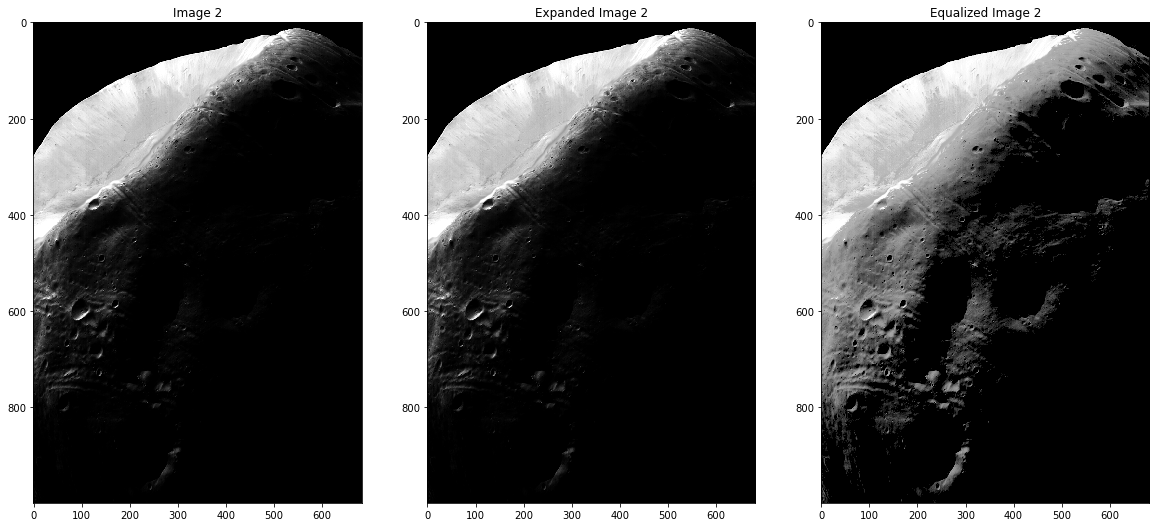

In [23]:
expandedFig2 = expandImage(fig2, np.amin(fig2), np.amax(fig2))
equalizedFig2 = equalizeImage(fig2,fig2.shape[1], fig2.shape[0])

plt.figure(figsize=(20,15))
plt.subplot(131);plt.title('Image 2');plt.imshow(fig2)
plt.subplot(132);plt.title('Expanded Image 2');plt.imshow(expandedFig2)
plt.subplot(133);plt.title('Equalized Image 2');plt.imshow(equalizedFig2)

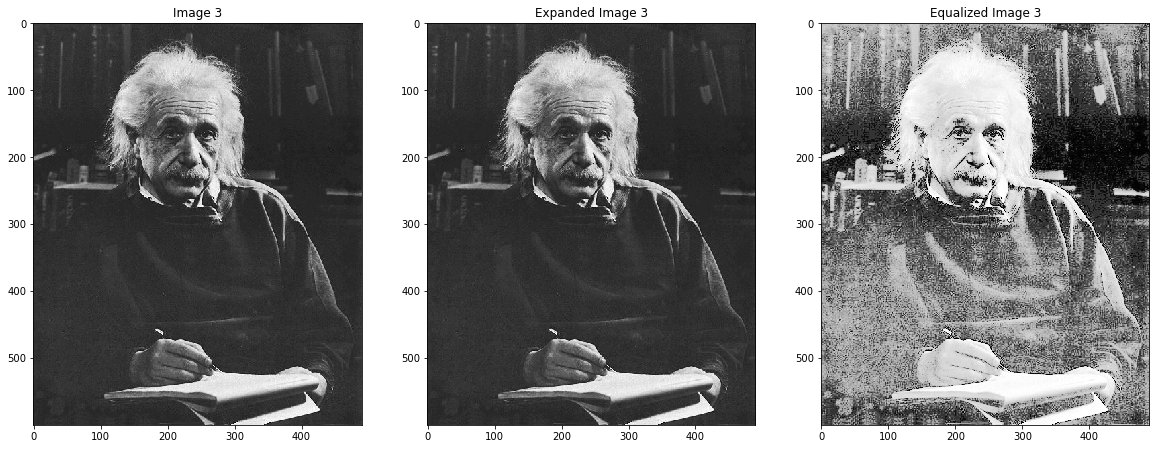

In [24]:
expandedFig3 = expandImage(fig3, np.amin(fig3), np.amax(fig3))
equalizedFig3 = equalizeImage(fig3,fig3.shape[1], fig3.shape[0])

plt.figure(figsize=(20,15))
plt.subplot(131);plt.title('Image 3');plt.imshow(fig3)
plt.subplot(132);plt.title('Expanded Image 3');plt.imshow(expandedFig3)
plt.subplot(133);plt.title('Equalized Image 3');plt.imshow(equalizedFig3)